### Pobranie danych z Boston Housing Dataset i przypisanie nazwy kolumn

In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PIRATIO', 'B', 'LSTAT', 'MEDV']
pd.read_csv(url, sep=r'\s+', names=names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Podstawowa Exploratory Data Analysis (EDA)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PIRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

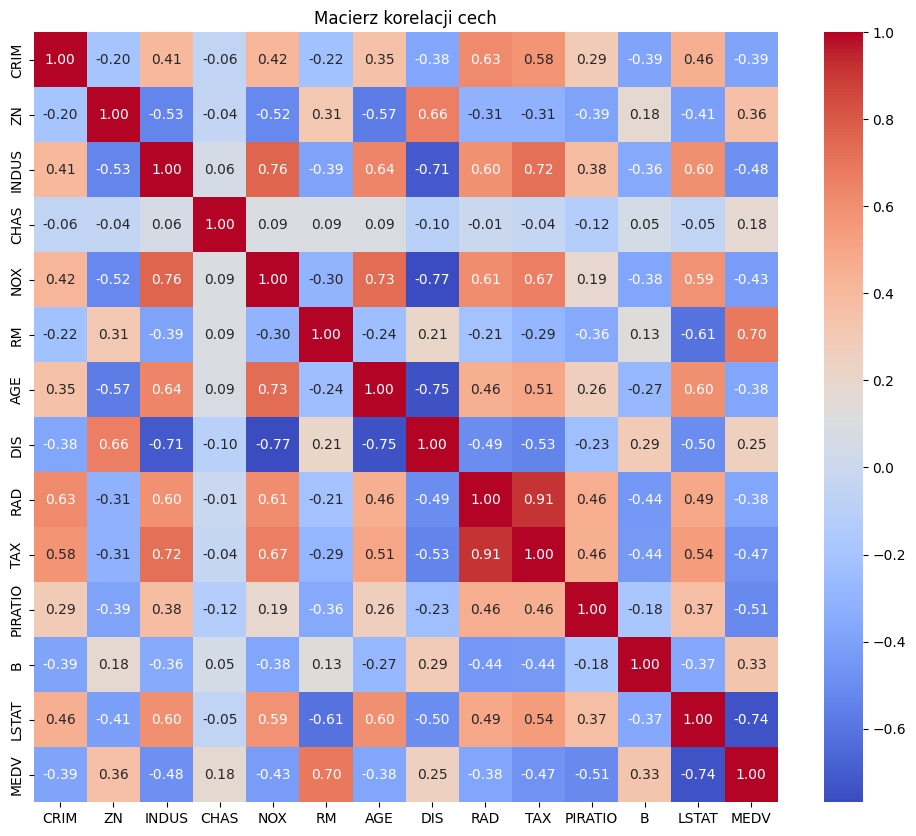

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Podstawowe statystyki
print(dataset.describe())

# Korelacje
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji cech')
plt.show()

Najsilniejszą dodatnią korelację zaobserwowano między zmiennymi TAX i RAD, co może wskazywać na współliniowość.

Silne ujemne korelacje między DIS a INDUS, NOX i AGE, oraz LSTAT a MEDV, również mogą świadczyć o potencjalnej współliniowości między tymi zmiennymi.

CHAS jako zmienna najsłabiej skorelowana z innymi nie powoduje współliniowości, ale jej wpływ predykcyjny może być ograniczony.

### Podział zbioru danych na zbiór treningowy i testowy

In [9]:
from sklearn.model_selection import train_test_split

X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Modele - regresja liniowa i XGBoost

In [10]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb

# Regresja liniowa
lr = LinearRegression()
lr.fit(X_train, y_train)

# XGBoost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3,
                          learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

### Optymalne hiperparametry dla modelu XGBoost - GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3)

grid = GridSearchCV(estimator=xg_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best score: ", grid.best_score_)
print("Best params: ", grid.best_params_)


Best score:  -13.743169435966848
Best params:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


### Porównanie wyników różnych modeli na zbiorze testowym

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regresja liniowa
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("  MSE: ", mean_squared_error(y_test, y_pred_lr))
print("  MAE: ", mean_absolute_error(y_test, y_pred_lr))
print("  R2:  ", r2_score(y_test, y_pred_lr))

# XGBoost
xg_reg.fit(X_train, y_train)
y_pred_xg = xg_reg.predict(X_test)

print("XGBoost:")
print("  MSE: ", mean_squared_error(y_test, y_pred_xg))
print("  MAE: ", mean_absolute_error(y_test, y_pred_xg))
print("  R2:  ", r2_score(y_test, y_pred_xg))


Linear Regression:
  MSE:  24.291119474973478
  MAE:  3.189091965887837
  R2:   0.6687594935356326
XGBoost:
  MSE:  27.48358210839519
  MAE:  3.3904440028994687
  R2:   0.6252261792043328


### Sprawdzenie założeń dla regresji liniowej

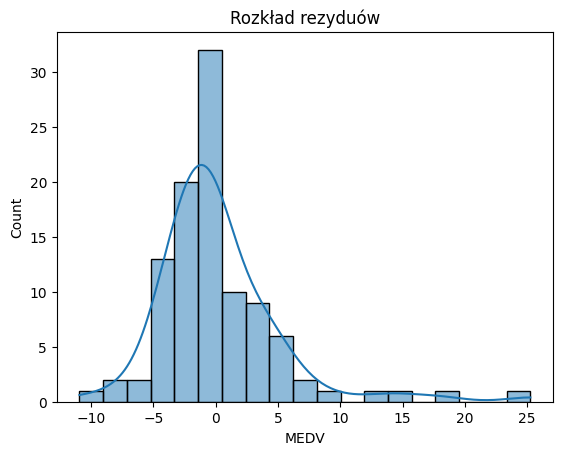

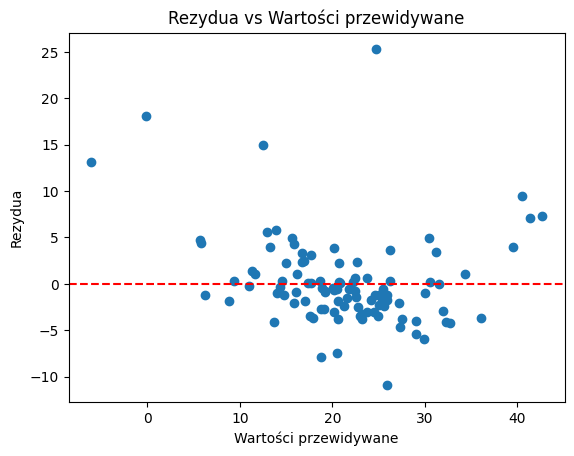

In [17]:
# Sprawdzenie reszt
import scipy.stats as stats

residuals = y_test - y_pred_lr

# Histogram reszt
sns.histplot(residuals, kde=True)
plt.title("Rozkład rezyduów")
plt.show()

# Homoscedastyczność
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Wartości przewidywane")
plt.ylabel("Rezydua")
plt.title("Rezydua vs Wartości przewidywane")
plt.show()


### 1. Rozkład reszt (górny wykres)
Rozkład jest w miarę normalny, co jest dobrą oznaką, ale nie idealny - jest lekko skośny w prawo.

### 2. Reszty vs Wartości przewidywane (dolny wykres)
Model nie spełnia w pełni założenia homoskedastyczności – wariancja reszt nie jest stała. Nie widać też wyraźnego wzoru nieliniowego.